In [28]:
import time

In [29]:
def getFile(filename):
    f = open(filename, 'r')    
    line = f.readline()
    arrays = []
    while line:
        arrays.append([int(i) for i in line[1:-2].split(',')])  #CONVERT A STRING TO INTEGER
        line = f.readline()   #READ ELEMENT LINE BY LINE
    f.close()
    return arrays

In [30]:
def saveFile(filename, arrays):
    file1 = open(filename,"w") 
    for arr in arrays:
        line = str(arr)+'\n'
        file1.writelines(line) 
    file1.close() #to change file access modes

In [31]:
import random

def generate_array(length):
    generated_array = []
    for i in range(0,length):
        generated_array.append(random.randint(0,length))
    return generated_array

In [32]:
#creating a array of size 5,10 15..... 1000
length_array = []
i=0
input_size = int(input("enter the size of a array: "))
while i<=input_size:
# while i<=1000:
    i+=5
    length_array.append(i)
#     print(length_array)
    

random_arrays = []
asc_arrays = []
des_arrays = []
for i in length_array:
    random_arrays.append(generate_array(i))   #STORE RANDOM NUMBER
    asc_arrays.append(sorted(generate_array(i)))    #STORE NUMBER IN ASCENDING ORDER
    des_arrays.append(sorted(generate_array(i), reverse=True))        #STORE NUMBER IN DESCENDING ORDER
    
saveFile('ascending_file.txt', asc_arrays)
saveFile('descending_file.txt', des_arrays)
saveFile('rand_file.txt', random_arrays)

enter the size of a array: 100


In [33]:
def insertion_sort(generated_list):
    len_generated_list = len(generated_list)
#     print("the length of the generated list : ",len_generated_list)
    
    for current_index in range(1,len_generated_list):
        current_element = generated_list[current_index]  #current element 
        previous_index = current_index - 1                   #previous index
        
        while previous_index >= 0 and current_element < generated_list[previous_index]:
            generated_list[previous_index+1] = generated_list[previous_index]
            generated_list[previous_index] = current_element
            previous_index = previous_index - 1
        
        
    return generated_list

In [34]:
if __name__ == '__main__':
    insert_des_lists = getFile('descending_file.txt')
    insert_asc_lists = getFile('ascending_file.txt')
    insert_random_lists = getFile('rand_file.txt')
    
    total_asc_insertion_time = []
    total_des_insertion_time = []
    total_ran_insertion_time = []
    
    sorted_des_inserted_list = []
    sorted_asc_inserted_list = []
    sorted_ran_inserted_list = []
    
    for genearted_list in insert_des_lists:
        
        insertion_desc_start_time = time.time()
        sorted_des_inserted_list.append(insertion_sort(genearted_list))
        insertion_desc_end_time = time.time()
        
        insertion_des_run_time = insertion_desc_end_time-insertion_desc_start_time
        
        total_des_insertion_time.append(insertion_des_run_time)
        
    for genearted_list in insert_asc_lists:
        
        insertion_asc_start_time = time.time()
        sorted_asc_inserted_list.append(insertion_sort(genearted_list))
        insertion_asc_end_time = time.time()
        
        insertion_asc_run_time = insertion_asc_end_time-insertion_asc_start_time
        
        total_asc_insertion_time.append(insertion_asc_run_time)
        
        
    for genearted_list in insert_random_lists:
        
        insertion_ran_start_time = time.time()
        sorted_ran_inserted_list.append(insertion_sort(genearted_list))
        insertion_ran_end_time = time.time()
        
        insertion_ran_run_time = insertion_ran_end_time-insertion_ran_start_time
        
        total_ran_insertion_time.append(insertion_ran_run_time)
        
        
    print("creating a insertion_sort file which sorted the descending order number: \n")    
    saveFile('insert_descending_file.txt',sorted_des_inserted_list)
    print("creating a insertion_sort file which sorted the ascending order number: \n") 
    saveFile('insert_ascending_file.txt',sorted_asc_inserted_list)
    print("creating a insertion_sort file which sorted the random number: \n") 
    saveFile('insert_random_file.txt',sorted_ran_inserted_list)
    

creating a insertion_sort file which sorted the descending order number: 

creating a insertion_sort file which sorted the ascending order number: 

creating a insertion_sort file which sorted the random number: 



In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

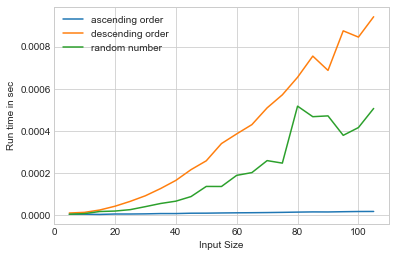

In [36]:
plt.xlabel('Input Size')
plt.ylabel('Run time in sec')
fig = plt.gcf()
plt.plot(length_array,total_asc_insertion_time);
plt.plot(length_array,total_des_insertion_time)
plt.plot(length_array,total_ran_insertion_time)
plt.legend(['ascending order','descending order','random number'], loc='upper left')
plt.show()
# plt.draw()
fig.savefig('insertionSort_runtime.png',dpi = 200)